In [11]:
pwd


u'/home/krutika/Documents/Summer_Projects/Keras_Learning'

In [12]:
import numpy as np
import pandas as pd


In [13]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda
from sklearn.cross_validation import train_test_split

In [15]:
df = pd.read_csv("data.csv")

In [16]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
df = df.drop(["id","Unnamed: 32"],axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
pd.isnull(df).sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [20]:
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return data

In [22]:
df=mapping(df,feature="diagnosis")

In [23]:
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
110,1,9.777,16.99,62.50,290.2,0.10370,0.08404,0.04334,0.01778,0.1584,...,11.05,21.47,71.68,367.0,0.1467,0.1765,0.1300,0.05334,0.2533,0.08468
558,1,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
193,0,12.340,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.04562,0.1943,...,15.65,39.34,101.70,768.9,0.1785,0.4706,0.4425,0.14590,0.3215,0.12050
506,1,12.220,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.02166,0.2124,...,13.16,24.17,85.13,515.3,0.1402,0.2315,0.3535,0.08088,0.2709,0.08839
161,0,19.190,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,...,22.03,17.81,146.60,1495.0,0.1124,0.2016,0.2264,0.17770,0.2443,0.06251


In [24]:
X= df.drop(["diagnosis"], axis =1)
y= df["diagnosis"]

In [25]:
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     1
20     1
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
539    1
540    1
541    1
542    1
543    1
544    1
545    1
546    1
547    1
548    1
549    1
550    1
551    1
552    1
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    0
563    0
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [26]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2, random_state=42)

In [27]:
def getModel(arr):
    model=Sequential()
    for i in range(len(arr)):
        if i!=0 and i!=len(arr)-1:
            if i==1:
                model.add(Dense(arr[i],input_dim=arr[0],kernel_initializer='normal', activation='relu'))
            else:
                model.add(Dense(arr[i],activation='relu'))
    model.add(Dense(arr[-1],kernel_initializer='normal',activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['accuracy'])
    return model

In [28]:
firstModel = getModel([30,50,1])

In [29]:
import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

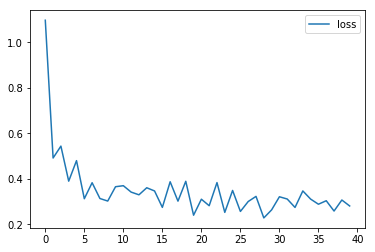

In [30]:
firstModel.fit(np.array(trainX),np.array(trainY),epochs=40,callbacks=[plot_losses])


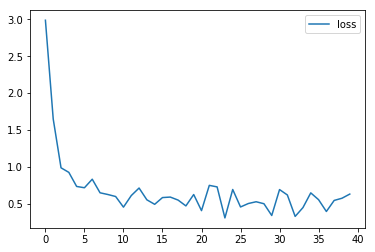

In [31]:
secondModel=getModel([30,100,1])
secondModel.fit(np.array(trainX),np.array(trainY),epochs=40,callbacks=[plot_losses])


In [33]:
predY=firstModel.predict(np.array(testX))
predY=np.round(predY).astype(int).reshape(1,-1)[0]
from sklearn.metrics import confusion_matrix
m=confusion_matrix(predY,testY)
tn, fn, fp, tp=confusion_matrix(predY,testY).ravel()
m=pd.crosstab(predY,testY)
print("Confusion matrix")
print(m)


Confusion matrix
diagnosis   0   1
row_0            
0          34   0
1           9  71


In [ ]:
# The above is the confusion matrix for it.